<a href="https://colab.research.google.com/github/SMN-SENAMHI/ADAPTACION/blob/main/CMIP6-VERIFICACION-DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install intake intake-esm
!pip install xmip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
import intake
import matplotlib.pyplot as plt
from xmip.preprocessing import combined_preprocessing


In [ ]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
cat = intake.open_esm_datastore(cat_url)


In [ ]:
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207


In [ ]:
cat.df.columns


Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year', 'version'],
      dtype='object')

In [ ]:
cat.nunique()


,0
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,61


In [ ]:
cat.keys()

['AerChemMIP.AS-RCEC.TaiESM1.histSST.AERmon.gn',
 'AerChemMIP.AS-RCEC.TaiESM1.histSST-piNTCF.AERmon.gn',
 'AerChemMIP.AS-RCEC.TaiESM1.histSST-piNTCF.CFmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.hist-piAer.SImon.gn',
 'AerChemMIP.BCC.BCC-ESM1.histSST.AERmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.histSST.Amon.gn',
 'AerChemMIP.BCC.BCC-ESM1.piClim-control.AERmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.AERmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.Amon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.Emon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.LImon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.Lmon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.Omon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.SImon.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370.day.gn',
 'AerChemMIP.BCC.BCC-ESM1.ssp370-lowNTCF.SImon.gn',
 'AerChemMIP.CNRM-CERFACS.CNRM-ESM2-1.hist-1950HC.AERmon.gr',
 'AerChemMIP.CNRM-CERFACS.CNRM-ESM2-1.hist-1950HC.Amon.gr',
 'AerChemMIP.CNRM-CERFACS.CNRM-ESM2-1.hist-1950HC.Omon.gn',
 'AerChemMIP.CNRM-CERFACS.CNRM-ESM2-1.hist-piNTCF.AERmon.gr',
 'AerC

In [ ]:
cat.keys_info()

,activity_id,institution_id,source_id,experiment_id,table_id,grid_label
key,,,,,,
AerChemMIP.AS-RCEC.TaiESM1.histSST.AERmon.gn,AerChemMIP,AS-RCEC,TaiESM1,histSST,AERmon,gn
AerChemMIP.AS-RCEC.TaiESM1.histSST-piNTCF.AERmon.gn,AerChemMIP,AS-RCEC,TaiESM1,histSST-piNTCF,AERmon,gn
AerChemMIP.AS-RCEC.TaiESM1.histSST-piNTCF.CFmon.gn,AerChemMIP,AS-RCEC,TaiESM1,histSST-piNTCF,CFmon,gn
AerChemMIP.BCC.BCC-ESM1.hist-piAer.SImon.gn,AerChemMIP,BCC,BCC-ESM1,hist-piAer,SImon,gn
AerChemMIP.BCC.BCC-ESM1.histSST.AERmon.gn,AerChemMIP,BCC,BCC-ESM1,histSST,AERmon,gn
...,...,...,...,...,...,...
ScenarioMIP.UA.MCM-UA-1-0.ssp585.Lmon.gn,ScenarioMIP,UA,MCM-UA-1-0,ssp585,Lmon,gn
ScenarioMIP.UA.MCM-UA-1-0.ssp585.Ofx.gn,ScenarioMIP,UA,MCM-UA-1-0,ssp585,Ofx,gn
ScenarioMIP.UA.MCM-UA-1-0.ssp585.Omon.gn,ScenarioMIP,UA,MCM-UA-1-0,ssp585,Omon,gn


In [ ]:
# Listar las actividades disponibles en el catálogo
cat.df['activity_id'].unique()


<ArrowExtensionArray>
[ 'HighResMIP',        'CMIP',       'CFMIP', 'ScenarioMIP',  'AerChemMIP',
       'RFMIP',      'FAFMIP',       'DAMIP',       'LUMIP',      'CDRMIP',
       'GMMIP',       'C4MIP',        'OMIP',        'PMIP',      'LS3MIP',
        'DCPP',       'PAMIP',      'ISMIP6']
Length: 18, dtype: large_string[pyarrow]

In [ ]:
# Listar las actividades disponibles en el catálogo
cat.df['experiment_id'].unique()

<ArrowExtensionArray>
[ 'highresSST-present',           'piControl',        'control-1950',
           'hist-1950',          'historical',                'amip',
        'abrupt-4xCO2',        'abrupt-2xCO2',      'abrupt-0p5xCO2',
             '1pctCO2',
 ...
        'pa-futArcSIC',            'pa-pdSIC',      'historical-ext',
  'pdSST-futArcSICSIT', 'pdSST-futOkhotskSIC',  'pdSST-futBKSeasSIC',
         'pa-piArcSIC',         'pa-piAntSIC',        'pa-futAntSIC',
      'pdSST-pdSICSIT']
Length: 170, dtype: large_string[pyarrow]

In [ ]:
# Listar las actividades disponibles en el catálogo
cat.df['source_id'].unique()

<ArrowExtensionArray>
[      'CMCC-CM2-HR4',      'EC-Earth3P-HR',    'HadGEM3-GC31-MM',
    'HadGEM3-GC31-HM',    'HadGEM3-GC31-LM',         'EC-Earth3P',
       'ECMWF-IFS-HR',       'ECMWF-IFS-LR',    'HadGEM3-GC31-LL',
      'CMCC-CM2-VHR4',           'GFDL-CM4',           'GFDL-AM4',
       'IPSL-CM6A-LR',           'E3SM-1-0',         'CNRM-CM6-1',
          'GFDL-ESM4',         'GFDL-ESM2M',       'GFDL-CM4C192',
        'GFDL-OM4p5B',        'GISS-E2-1-G',        'GISS-E2-1-H',
        'CNRM-ESM2-1',        'BCC-CSM2-MR',           'BCC-ESM1',
             'MIROC6',      'AWI-CM-1-1-MR',       'EC-Earth3-LR',
   'IPSL-CM6A-ATM-HR',              'CESM2',        'CESM2-WACCM',
      'CNRM-CM6-1-HR',         'MRI-ESM2-0',        'SAM0-UNICON',
     'GISS-E2-1-G-CC',        'UKESM1-0-LL',          'EC-Earth3',
      'EC-Earth3-Veg',        'FGOALS-f3-L',            'CanESM5',
      'CanESM5-CanOE',          'INM-CM4-8',          'INM-CM5-0',
              'NESM3',    'MPI-ESM-1-2-H

In [ ]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat2 = cat.search(
    variable_id='tos',        # temperatura superficial del océano
    table_id='Omon',          # datos mensuales del océano
    experiment_id='historical',  # simulación histórica
    source_id=['GFDL-ESM4']      # modelo del GFDL
)

# Mostramos el DataFrame resultante con los metadatos filtrados
cat2.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20180701
1,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20180701
2,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20180701
3,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20180701
4,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20190726
5,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,tos,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20190726


In [ ]:
cat2.df['member_id'].unique()


<ArrowExtensionArray>
['r3i1p1f1', 'r2i1p1f1', 'r1i1p1f1']
Length: 3, dtype: large_string[pyarrow]

In [ ]:
cat2.df['grid_label'].unique()

<ArrowExtensionArray>
['gr', 'gn']
Length: 2, dtype: large_string[pyarrow]

# Nota:
#   'gn' → grilla nativa del modelo (mayor resolución)
#   'gr' → datos reinterpolados a una grilla regular de lat/lon

In [ ]:
cat3 = cat.search(
    variable_id='tos',                # Temperatura del océano
    experiment_id='historical',       # Forzamiento histórico
    table_id='Omon',                  # Datos mensuales oceánicos
    grid_label='gn',                  # Grilla nativa del modelo
    source_id=['GFDL-ESM4'],          # Modelo seleccionado
    member_id=['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']  # Solo algunos miembros
)

cat3.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20180701
1,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20180701
2,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,<NA>,20190726


In [ ]:
# Cargar los datasets del catálogo refinado
ddict = cat3.to_dataset_dict(
    xarray_open_kwargs={'use_cftime': True},
    storage_options={'token': 'anon'},  # acceso anónimo a Google Cloud Storage
)




--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [ ]:
list(ddict.keys())

['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn']

In [ ]:
ddict['CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn']

<xarray.Dataset> Size: 10GB
Dimensions:         (member_id: 3, dcpp_init_year: 1, time: 1980, y: 576,
                     x: 720, bnds: 2, vertex: 4)
Coordinates:
  * member_id       (member_id) object 24B 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) object 8B None
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
  * y               (y) float64 5kB -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * x               (x) float64 6kB -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * bnds            (bnds) float64 16B 1.0 2.0
    lat             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
    lat_bnds        (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    lon             (y, x) float32 2MB dask.array<chunksize=(576, 720), meta=np.ndarray>
    lon_bnds        (y, x, vertex) float32 7MB dask.array<chunksize=(576, 720, 4), meta=np.ndarray>
    time_bnds       (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: vertex
Data variables:
    tos             (member_id, dcpp_init_year, time, y, x) float32 10GB dask.array<chunksize=(1, 1, 64, 576, 720), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omo...

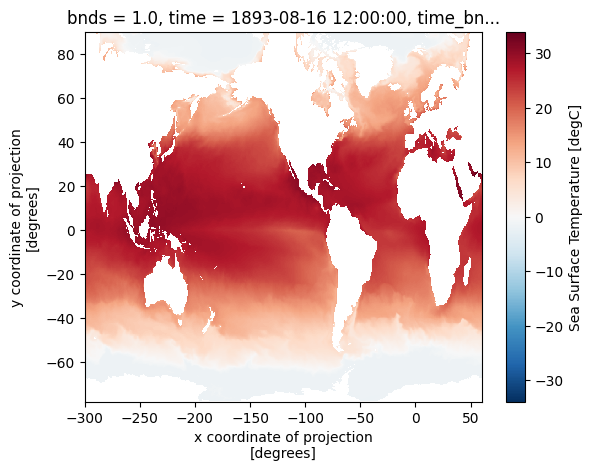

In [ ]:
name = 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn'
ds = ddict[name]

# Seleccionamos un tiempo y miembro específicos (ejemplo: índice 523 ≈ 1980s)
values = ds.isel(time=523, member_id=1, bnds=0, vertex=0, dcpp_init_year=0)

# Graficamos el campo de temperatura superficial del mar
values.tos.plot()




In [ ]:
name = 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn'
ds = ddict[name]

# Promedio global (x, y) y reducción temporal a pasos anuales
mean_temp = ds.tos.mean(('x', 'y')).coarsen(time=12).mean()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir coordenada temporal a año decimal
mean_temp = mean_temp.assign_coords(
    time=[t.year + (t.month-1)/12 for t in mean_temp.time.values]
)


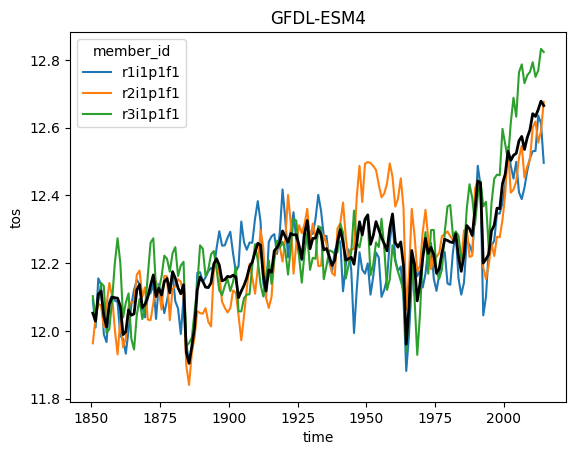

In [ ]:
#!pip install nc-time-axis
import nc_time_axis  # fuerza la activación del eje de tiempo para cftime


# Advertencia: este código puede tomar entre 4 a 13 minutos en ejecutarse dependiendo de la conexión a internet
plt.figure()
mean_temp.plot(hue='member_id')
mean_temp.mean('member_id').plot(color='k', linewidth=2)
plt.title(ds.attrs['source_id']) #Extract the model name right from the dataset metadata
plt.show()




In [ ]:
ds.to_netcdf('CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn')

ValueError: When encoding chunked arrays of datetime values, both the units and dtype must be prescribed or both must be unprescribed. Prescribing only one or the other is not currently supported. Got a units encoding of hours since 1850-01-16 12:00:00.000000 and a dtype encoding of None.

In [ ]:
from xmip.preprocessing import (
    rename_cmip6,
    promote_empty_dims,
    broadcast_lonlat,
    replace_x_y_nominal_lat_lon,
    correct_lon,
    correct_coordinates,
    parse_lon_lat_bounds,
    maybe_convert_bounds_to_vertex,
    maybe_convert_vertex_to_bounds
)


In [ ]:
def preprocesamiento(ds):
    ds = ds.copy()
    ds = rename_cmip6(ds)
    ds = promote_empty_dims(ds)
    ds = broadcast_lonlat(ds)
    ds = replace_x_y_nominal_lat_lon(ds)
    ds = correct_lon(ds)
    ds = correct_coordinates(ds)
    ds = parse_lon_lat_bounds(ds)
    ds = maybe_convert_bounds_to_vertex(ds)
    ds = maybe_convert_vertex_to_bounds(ds)
    return ds





In [ ]:
ddict_xmip = cat.to_dataset_dict(
    xarray_open_kwargs={"use_cftime": True},
    preprocess=preprocesamiento,
)




--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [ ]:
name = 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn'
ds2 = ddict_xmip[name]
ds2.to_netcdf(name + '.nc')